In [1]:
import math as mt
import matplotlib.pyplot as plt
import csv

# Lijsten waarin we alle resultaten verzamelen
lijst_CoR = []
lijst_pressure = []


In [2]:
def analyseer_bestand(bestand, druk, index_bounce_1, index_bounce_2):
    lijst_ywaarde_string = []
    lijst_frame_string = []

    # Data inlezen
    with open(bestand, 'r') as data:
        for regel in data:
            data_regels_opgeknipt = regel.strip().split()
            data_getallen_opgeknipt = data_regels_opgeknipt[0].split(',')
            lijst_frame_string.append(data_getallen_opgeknipt[0])
            lijst_ywaarde_string.append(data_getallen_opgeknipt[2])

    # Header verwijderen
    del lijst_frame_string[0]
    del lijst_ywaarde_string[0]

    # Omzetten naar juiste types
    lijst_ywaarde = [float(k) for k in lijst_ywaarde_string]
    lijst_frame = [int(i) for i in lijst_frame_string]

    # Y-waarden omdraaien (1088 - y)
    lijst_ywaarde_omgekeerd = [1088 - y for y in lijst_ywaarde]

    # Plot maken
    plt.plot(lijst_frame, lijst_ywaarde_omgekeerd, 'r')
    plt.xlabel("Tijd (Frames)")
    plt.ylabel("Hoogte (pixels)")
    plt.title(f"Hoogte vs Tijd ({druk} mbar)")
    plt.show()

    # Maxima vinden (stuiters)
    lijst_max_hoogtes = []
    for i in range(len(lijst_ywaarde_omgekeerd)-1):
        dhoogte = lijst_ywaarde_omgekeerd[i+1] - lijst_ywaarde_omgekeerd[i]
        if dhoogte < 0 and lijst_ywaarde_omgekeerd[i] - lijst_ywaarde_omgekeerd[i-1] > 0:
            lijst_max_hoogtes.append(lijst_ywaarde_omgekeerd[i])

    # CoR berekenen
    CoR = lijst_max_hoogtes[index_bounce_2] / lijst_max_hoogtes[index_bounce_1]
    print(f"The CoR bij {druk} mbar is: {CoR}")
    
    lijst_pressure.append(druk)
    lijst_CoR.append(CoR)


In [3]:
# analyseer_bestand('berekeningen_metingen_17-7/results_100_1018,5hPa.csv', 1018.5, 26, 27)
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_1018,5hPa.csv", 1018.5, 26, 27)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Gebruiker/Downloads/results_100_1018,5hPa.csv'

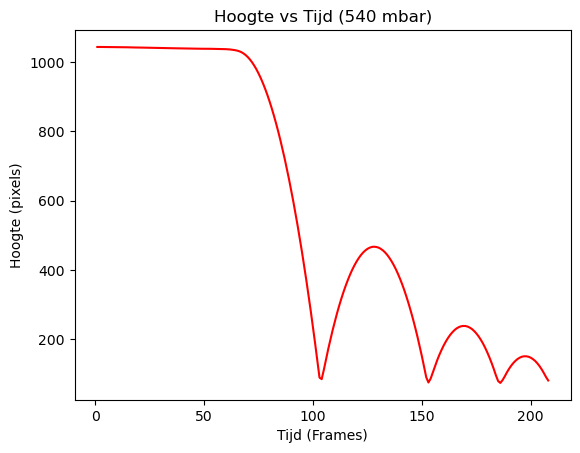

The CoR bij 540 mbar is: 0.5109889627606908


In [ ]:
# analyseer_bestand('berekeningen_metingen_17-7/results_100_540mbar.csv', 540, 6, 7)
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_540mbar.csv", 540, 6, 7)

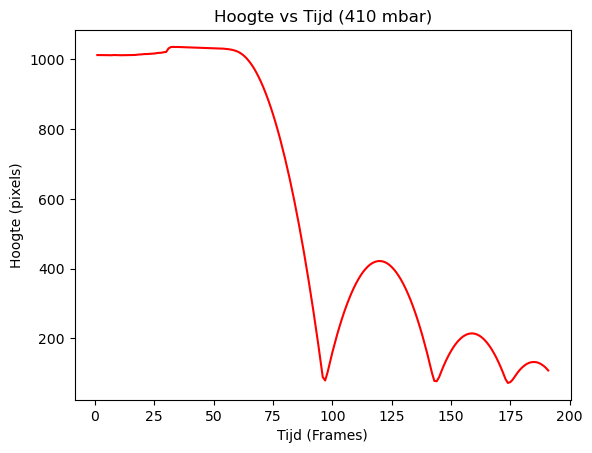

The CoR bij 410 mbar is: 0.507924439706742


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_410mbar.csv", 410, 8, 9)

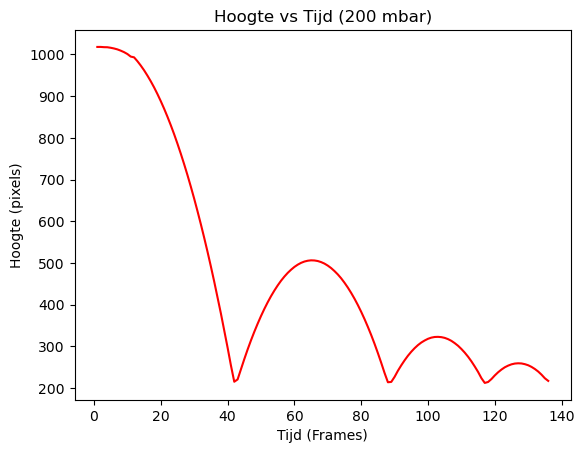

The CoR bij 200 mbar is: 0.6371767349932482


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_200mbar.csv", 200, 1, 2)


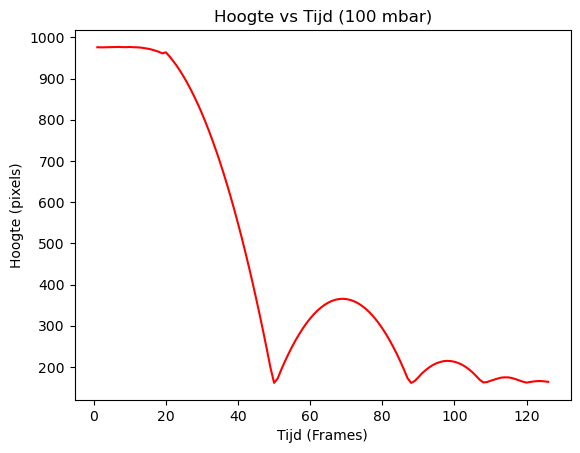

The CoR bij 100 mbar is: 0.5875368150267334


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_100mbar.csv", 100, 4, 5)


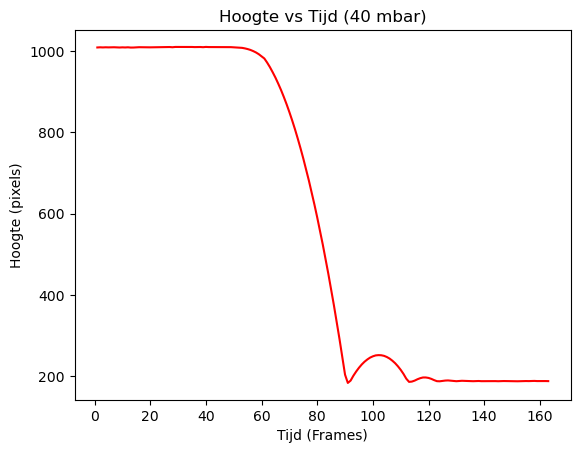

The CoR bij 40 mbar is: 0.24991167474105708


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_40mbar.csv", 40, 15, 16)


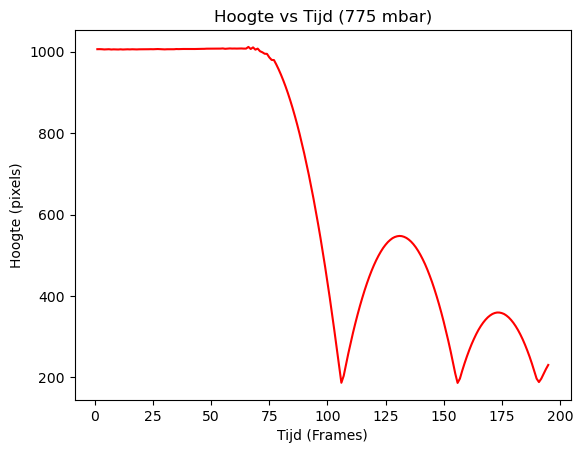

The CoR bij 775 mbar is: 0.5433872689173672


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_775mbar.csv", 775, 20, 21)


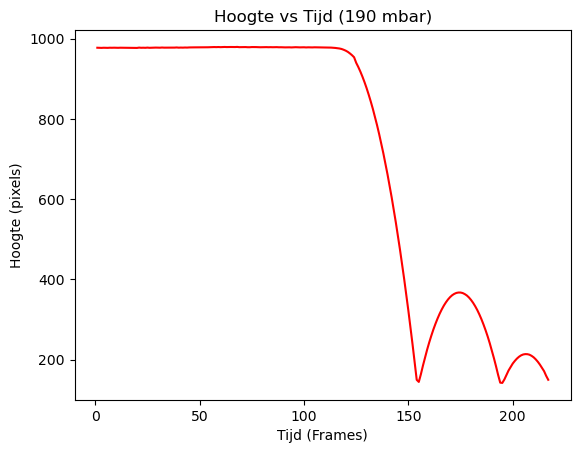

The CoR bij 190 mbar is: 0.3758642785442393


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_190mbar_18-7.csv", 190, 40, 41)


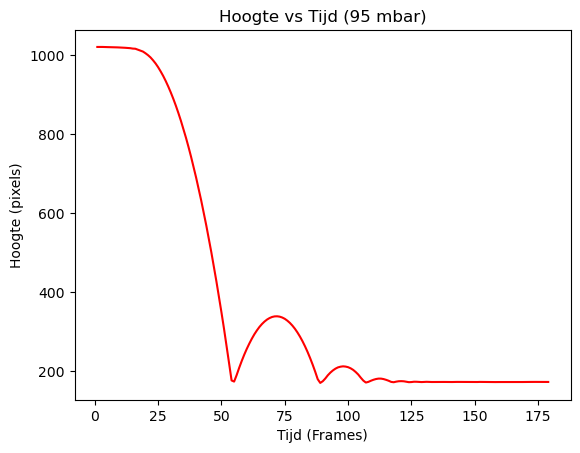

The CoR bij 95 mbar is: 0.33267968767229966


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_95mbar_18-7.csv", 95, 0, 1)


In [ ]:
analyseer_bestand("C:/Users/Gebruiker/Downloads/Results_100-300mbar.csv", 300, 19, 20)


IndexError: list index out of range

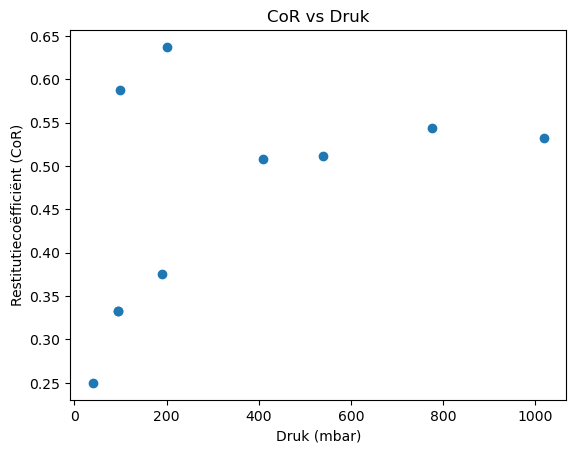

In [ ]:
plt.plot(lijst_pressure, lijst_CoR, 'o')
plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk")
plt.show()


In [ ]:
# foutvlaggen: papier (2 vellen), tracking fout, mbar afleesfout, lekken vacuum fout (10mbar)
# foutbepaling: stilstaand beeld / constante snelheid, valsnelheid van zwaartekraccht met kwadraat parabool fitten

In [ ]:
def analyseer_bestand_foutvlaggen(bestand, druk, index_bounce_1, index_bounce_2):
    lijst_ywaarde_string = []
    lijst_frame_string = []

    # Data inlezen
    with open(bestand, 'r') as data:
        for regel in data:
            data_regels_opgeknipt = regel.strip().split()
            data_getallen_opgeknipt = data_regels_opgeknipt[0].split(',')
            lijst_frame_string.append(data_getallen_opgeknipt[0])
            lijst_ywaarde_string.append(data_getallen_opgeknipt[2])

    # Header verwijderen
    del lijst_frame_string[0]
    del lijst_ywaarde_string[0]

    # Omzetten naar juiste types
    lijst_ywaarde = [float(k) for k in lijst_ywaarde_string]
    lijst_frame = [int(i) for i in lijst_frame_string]

    # Y-waarden omdraaien (1088 - y)
    lijst_ywaarde_omgekeerd = [1088 - y for y in lijst_ywaarde]

    # De parabool isoleren (stuk van de data weghalen)
    lijst_frame = lijst_frame[90:]
    lijst_ywaarde_omgekeerd = lijst_ywaarde_omgekeerd[90:]

    lijst_frame = lijst_frame[:-50]
    lijst_ywaarde_omgekeerd = lijst_ywaarde_omgekeerd[:-50]

    # Plot maken
    plt.plot(lijst_frame, lijst_ywaarde_omgekeerd, 'o')
    plt.xlabel("Tijd (Frames)")
    plt.ylabel("Hoogte (pixels)")
    plt.title(f"Hoogte vs Tijd ({druk} mbar)")
    plt.show()

    # Maxima vinden en CoR berekenen zijn nu uitgecommentarieerd
    # Als je die wil activeren, haal de # weg:
    #
    # lijst_max_hoogtes = []
    # for i in range(len(lijst_ywaarde_omgekeerd)-1):
    #     dhoogte = lijst_ywaarde_omgekeerd[i+1] - lijst_ywaarde_omgekeerd[i]
    #     if dhoogte < 0 and lijst_ywaarde_omgekeerd[i] - lijst_ywaarde_omgekeerd[i-1] > 0:
    #         lijst_max_hoogtes.append(lijst_ywaarde_omgekeerd[i])
    #
    # CoR = lijst_max_hoogtes[index_bounce_2] / lijst_max_hoogtes[index_bounce_1]
    # lijst_pressure.append(druk)
    # lijst_CoR.append(CoR)


In [ ]:
kan je nu van deze code denk je foutvlaggen / errorbars maken of zeggen hoe we dat kunnen doen. Dus stel we pakken een afleesfout van 10mbar, dus -10mbar tot +10mbar vanaf de 'werkelijke' waarde en we pakken van het lekken van de vacuumtank een fout van -5mbar tot +5mbar en soms ook -10mbar tot +10mbar, deze hing af van de meting.

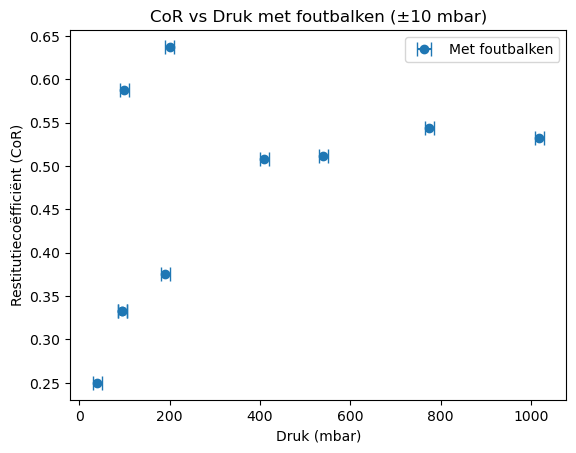

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Stel dat lijst_pressure en lijst_CoR al gevuld zijn door analyseer_bestand()

# Onzekerheden in druk (10 mbar per meting, kan later aangepast worden)
x_error = [10 for _ in lijst_pressure]  # 10 mbar naar links en rechts voor alle punten

# Plotten met errorbars
plt.errorbar(lijst_pressure, lijst_CoR, xerr=x_error, fmt='o', capsize=5, label="Met foutbalken")

# Labels en titel
plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk met foutbalken (±10 mbar)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Stel dat lijst_pressure (centrale waarden) en lijst_CoR al gevuld zijn
# papieren gelijk, druk varieert

# Begin- en einddrukken per meting (voorbeeldwaarden!)
begin_druks = [100, 530, 400, 190, 90, 35, 760, 190, 95]  # beginwaarden
eind_druks  = [200, 550, 420, 200, 110, 45, 790, 200, 100] # eindwaarden

# Afleesfout is altijd ±10 mbar
afleesfout = 10

# Bereken de foutbalken
x_errors = []
for i, midden in enumerate(lijst_pressure):
    min_val = min(begin_druks[i], eind_druks[i]) - afleesfout
    max_val = max(begin_druks[i], eind_druks[i]) + afleesfout
    lower_error = midden - min_val
    upper_error = max_val - midden
    x_errors.append([[lower_error], [upper_error]])  # asymmetrische foutbalk

# Plotten met asymmetrische errorbars
for i in range(len(lijst_pressure)):
    plt.errorbar(lijst_pressure[i], lijst_CoR[i], 
                 xerr=np.array(x_errors[i]), fmt='o', capsize=5, color='blue')

plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk met gecombineerde foutbalken (lek + afleesfout)")
plt.show()


IndexError: list index out of range

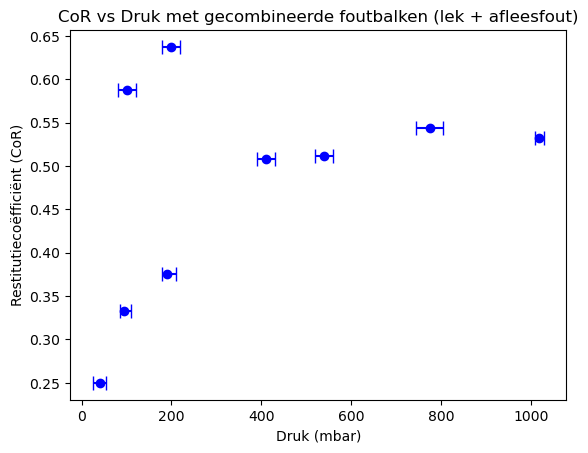

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Centrale drukwaarden (middenwaarden) ---
lijst_pressure = [1018.5, 540, 410, 200, 100, 40, 775, 190, 95]  # mbar

# --- CoR-waarden uit jouw berekeningen ---
lijst_CoR = [
    0.5321337442409626,  # 1018.5 mbar
    0.5109889627606908,  # 540 mbar
    0.507924439706742,   # 410 mbar
    0.6371767349932482,  # 200 mbar
    0.5875368150267334,  # 100 mbar
    0.24991167474105708, # 40 mbar
    0.5433872689173672,  # 775 mbar
    0.3758642785442393,  # 190 mbar
    0.33267968767229966  # 95 mbar
]

# --- Begin- en einddrukken (voor foutbalken) ---
# Hieruit bepalen we de totale onzekerheid (lek + afleesfout)
begin_druks = [
    1018.5,  # Atmosferisch (geen lek, enkel afleesfout)
    530, 400,  # Oude metingen (papier gelijk, druk varieert)
    190, 90, 35,  # Oude metingen (papier gelijk, druk varieert)
    755,  # Meting rond 775 mbar (pas aan indien nodig)
    190, 95  # Metingen van vandaag
]

eind_druks = [
    1018.5,  # Atmosferisch
    550, 420,  # Oude metingen
    210, 110, 45,  # Oude metingen
    795,  # Meting rond 775 mbar (pas aan indien nodig)
    200, 100  # Metingen van vandaag
]

# Afleesfout is altijd ±10 mbar
afleesfout = 10

# Bereken de foutbalken (asymmetrisch)
x_errors = []
for i, midden in enumerate(lijst_pressure):
    min_val = min(begin_druks[i], eind_druks[i]) - afleesfout
    max_val = max(begin_druks[i], eind_druks[i]) + afleesfout
    lower_error = midden - min_val
    upper_error = max_val - midden
    x_errors.append([[lower_error], [upper_error]])

# Plotten van CoR met foutbalken
for i in range(len(lijst_pressure)):
    plt.errorbar(lijst_pressure[i], lijst_CoR[i],
                 xerr=np.array(x_errors[i]), fmt='o', capsize=5, color='blue')

plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk met gecombineerde foutbalken (lek + afleesfout)")
plt.show()
